In [1]:
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name == 'Malgun Gothic':
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['Malgun Gothic']

## DB 접속

In [10]:
connection = sqlite3.connect('test.db')

In [11]:
connection.row_factory = sqlite3.Row

cursor = connection.cursor()

## 데이터 확인

In [12]:
cursor.execute('SELECT COUNT(id) AS count FROM animals')

row = cursor.fetchone()

row['count']

30589

In [14]:
cursor.execute('''
                SELECT * 
                FROM animals 
                LIMIT 10
                ''')

rows = cursor.fetchall()

pd.DataFrame(rows, columns=rows[0].keys())

,id,age,colorCd,happenDt,kindCd,orgNm,sexCd,weight
0,1,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,F,1(Kg)
1,2,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,M,1(Kg)
2,3,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,M,1(Kg)
3,4,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,F,1(Kg)
4,5,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,F,1(Kg)
5,6,2019(년생),흰색,20191014,[개] 미텔 스피츠,경상남도 사천시,M,1(Kg)
6,7,2019(년생),흰색,20191014,[개] 믹스견,경상남도 사천시,F,1(Kg)
7,8,2019(년생),흰색,20191014,[개] 믹스견,경상남도 창원시 진해구,M,0.7(Kg)
8,9,2019(년생),흰,20191014,[개] 믹스견,경상남도 창원시 진해구,M,0.8(Kg)
9,10,2019(년생),흰+갈+검,20191014,[개] 믹스견,경상남도 창원시 진해구,M,0.9(Kg)


## GROUP BY

In [15]:
sql = '''
          SELECT age
               , COUNT(id) AS count
            FROM animals
        GROUP BY age
        ORDER BY count DESC
'''

cursor.execute(sql)

rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,age,count
0,2019(년생),15586
1,2018(년생),3718
2,2017(년생),3616
3,2016(년생),2834
4,2014(년생),1352
5,2015(년생),1270
6,2013(년생),667
7,2009(년생),408
8,2012(년생),408
9,2011(년생),373


In [16]:
df.set_index('age')

,count
age,
2019(년생),15586
2018(년생),3718
2017(년생),3616
2016(년생),2834
2014(년생),1352
2015(년생),1270
2013(년생),667
2009(년생),408
2012(년생),408


In [26]:
# 파이 차트

df.set_index('age').plot.pie(y='count', figsize=(20, 20))

plt.show()

KeyError: 'age'

In [19]:
# '경기도' orgNm 갯수 세기

sql = '''
          SELECT orgNm
               , COUNT(id) AS count
            FROM animals
           WHERE orgNm LIKE ?
        GROUP BY orgNm
        ORDER BY count DESC
'''

# SQL injection 공격에 대비하기 위해 직접 안 쓰고 '?' 로 쓰고 외부에 쓴다
cursor.execute(sql, ['%경기도%'])

rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,orgNm,count
0,경기도 평택시,633
1,경기도 화성시,577
2,경기도 고양시,449
3,경기도 안산시,449
4,경기도 남양주시,444
5,경기도 수원시,341
6,경기도 시흥시,273
7,경기도 포천시,266
8,경기도 성남시,264
9,경기도 부천시,263


In [22]:
# '[고양이]' kindCd 갯수 세기
sql = '''
          SELECT kindCd
               , COUNT(id) AS count
            FROM animals
           WHERE kindCd LIKE ?
        GROUP BY kindCd
        ORDER BY count DESC
'''

cursor.execute(sql, ['%[고양이]%'])

rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=rows[0].keys())

df

,kindCd,count
0,[고양이] 한국 고양이,6907
1,[고양이] 기타,111
2,[고양이] 페르시안-페르시안 친칠라,107
3,[고양이] 혼합,107
4,[고양이] 코숏,103
5,[고양이] 터키시 앙고라,103
6,[고양이] 러시안 블루,70
7,[고양이] 믹스,66
8,[고양이] 고양이,63
9,[고양이] 샴,45


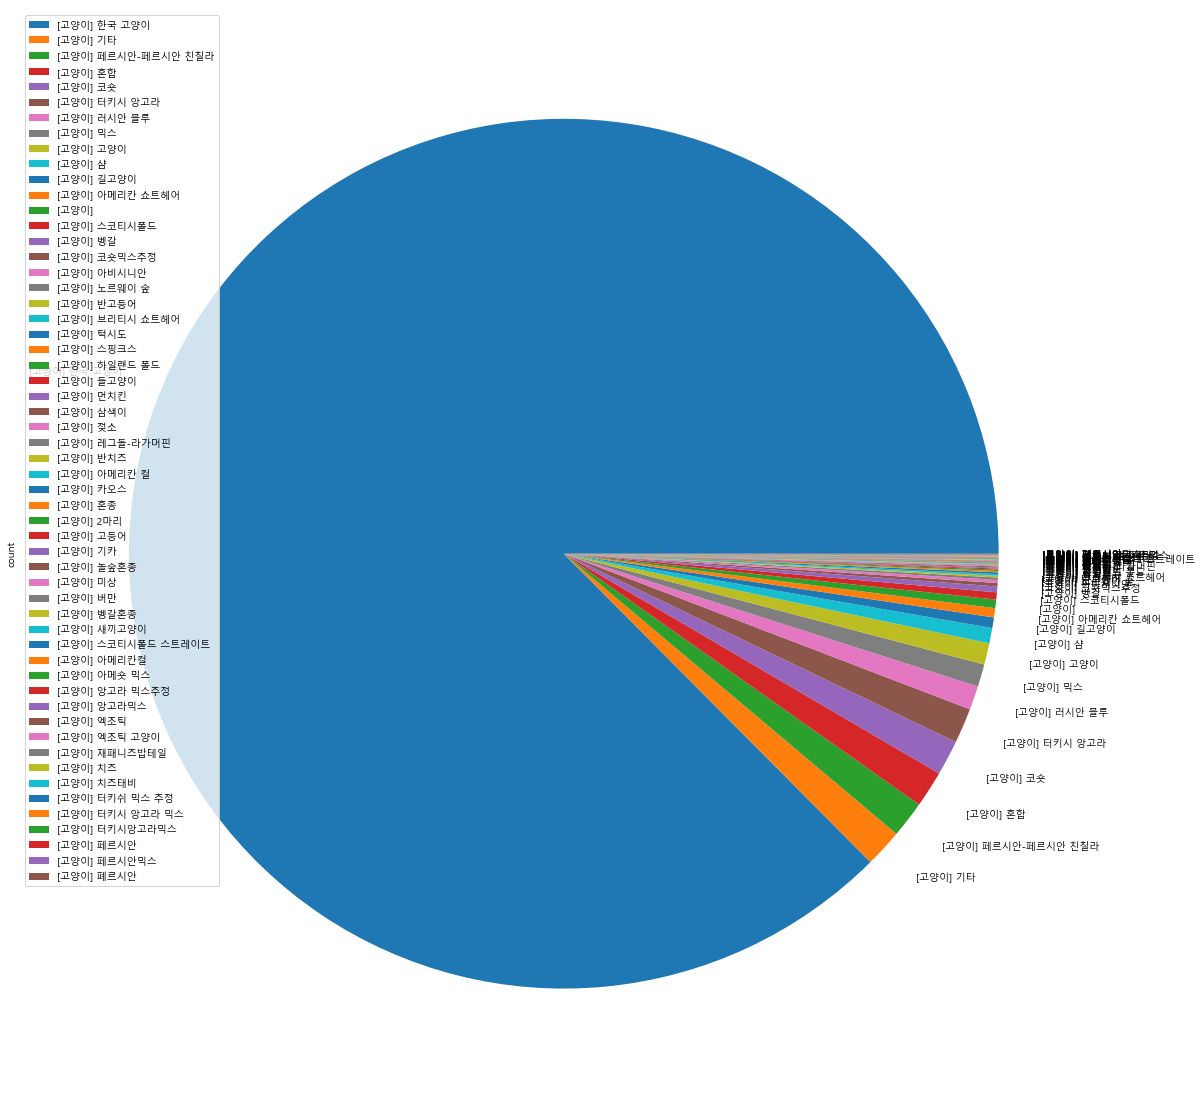

In [23]:
df.set_index('kindCd').plot.pie(y='count', figsize=(20, 20))

## DB 사용 종료
잘 썼습니다! (꾸벅)

In [24]:
connection.close()